<a href="https://colab.research.google.com/github/cantaruttim/Learning_Python/blob/main/Algor%C3%ADtimos/Estudos%20Diversos/M%C3%A9tricas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Métricas

In [ ]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:]
y = iris.target

In [ ]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(X,y)

DecisionTreeClassifier(criterion='entropy')

In [ ]:
from sklearn.datasets import load_iris
from sklearn import tree
iris = load_iris()
X, y = iris.data, iris.target
clf = tree.DecisionTreeClassifier(max_depth=2)
clf = clf.fit(X, y)

[Text(0.4, 0.8333333333333334, 'x[2] <= 2.45\ngini = 0.667\nsamples = 150\nvalue = [50, 50, 50]'),
 Text(0.2, 0.5, 'gini = 0.0\nsamples = 50\nvalue = [50, 0, 0]'),
 Text(0.6, 0.5, 'x[3] <= 1.75\ngini = 0.5\nsamples = 100\nvalue = [0, 50, 50]'),
 Text(0.4, 0.16666666666666666, 'gini = 0.168\nsamples = 54\nvalue = [0, 49, 5]'),
 Text(0.8, 0.16666666666666666, 'gini = 0.043\nsamples = 46\nvalue = [0, 1, 45]')]

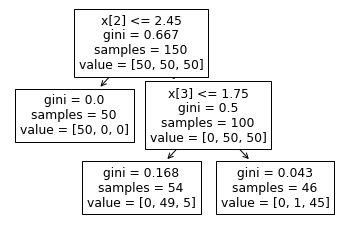

In [ ]:
tree.plot_tree(clf)

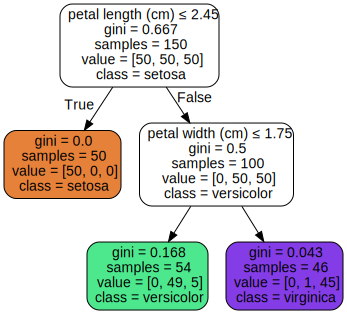

In [ ]:
import graphviz 

dot_data = tree.export_graphviz(clf, out_file=None, 
                     feature_names=iris.feature_names,  
                      class_names=iris.target_names,  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

# nesse caso caso uma folha tenha 5 cm de comprimento e 1.5cm de largura, teremos 90% de chance dela pertencer a classe versicolor

## Ensemble Learning

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [ ]:
%%time
log_clf = LogisticRegression()
rnd_clf = RandomForestClassifier()
svm_clf = SVC()

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)], voting='hard')
voting_clf.fit(X, y)

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


CPU times: user 396 ms, sys: 6.03 ms, total: 402 ms
Wall time: 436 ms


VotingClassifier(estimators=[('lr', LogisticRegression()),
                             ('rf', RandomForestClassifier()), ('svc', SVC())])

In [ ]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
  clf.fit(X, y)
  y_pred = clf.predict(X)
  print(clf.__class__.__name__, accuracy_score(y, y_pred))

LogisticRegression 0.9733333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


RandomForestClassifier 1.0
SVC 0.9733333333333334


/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


VotingClassifier 0.98


In [ ]:
from sklearn.ensemble import BaggingClassifier

In [ ]:
%%time
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators = 500,
    max_samples = 100, bootstrap= True, n_jobs = -1)
bag_clf.fit(X,y)
y_pred = bag_clf.predict(X)

CPU times: user 344 ms, sys: 52.9 ms, total: 396 ms
Wall time: 4.68 s


In [ ]:
bag_clf.score(X, y_pred)

1.0

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
%%time
rnd_clf = RandomForestClassifier(n_estimators = 500, max_leaf_nodes=16, n_jobs=-1)
rnd_clf.fit(X, y)

CPU times: user 1.69 s, sys: 80.1 ms, total: 1.77 s
Wall time: 2.18 s


RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1)

In [ ]:
y_pred_rf = rnd_clf.predict(X) 

In [ ]:
print(accuracy_score(y, y_pred_rf))

1.0


An ensemble model combines different machine learning models into one and perform better than alone.

Boosting is a strong alternative to bagging. Instead of aggregating predictions, boosters turn weak learners into strong learners by focusing on where the individual models (usually Decision Trees) went wrong. In Gradient Boosting, individual models train upon the residuals, the difference between the prediction and the actual results. Instead of aggregating trees, gradient boosted trees learns from errors during each boosting round.

XGBoost is short for “eXtreme Gradient Boosting.” The “eXtreme” refers to speed enhancements such as parallel computing and cache awareness that makes XGBoost approximately 10 times faster than traditional Gradient Boosting. In addition, XGBoost includes a unique split-finding algorithm to optimize trees, along with built-in regularization that reduces overfitting. Generally speaking, XGBoost is a faster, more accurate version of Gradient Boosting.

Boosting performs better than bagging on average, and Gradient Boosting is arguably the best boosting ensemble. Since XGBoost is an advanced version of Gradient Boosting, and its results are unparalleled, it’s arguably the best machine learning ensemble that we have.

<br/>

### Why should you learn XGBoost

- **XGBoost** is *easy to implement* in scikit-learn.
- **XGBoost** *is an ensemble*, so it scores better than individual models.
- **XGBoost** is regularized, so default models often *don’t overfit*.
- **XGBoost** is *very fast* (for ensembles).
- **XGBoost** *learns form its mistakes (gradient boosting)*.
- **XGBoost** *has extensive hyperparameters* for fine-tuning.
- **XGBoost** includes hyperparameters to *scale* imbalanced data and fill null values.

In [ ]:
## XGBoost

!pip install xgboost

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import xgboost; print(xgboost.__version__)

1.7.4


In [ ]:
from sklearn import datasets
X,y = datasets.load_diabetes(return_X_y=True)

In [ ]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score

scores = cross_val_score(XGBRegressor(n_estimators=600), X, y, scoring='neg_mean_squared_error')
(-scores)**0.5

array([62.8037234 , 65.78374862, 62.21464301, 66.41705052, 67.32538005])

In [ ]:
url = 'https://media.githubusercontent.com/media/PacktPublishing/Hands-On-Gradient-Boosting-with-XGBoost-and-Scikit-learn/master/Chapter02/heart_disease.csv'

import pandas as pd
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score


df = pd.read_csv(url)

X = df.iloc[:, :-1]
y = df.iloc[:, -1]

cross_val_score(XGBClassifier(), X, y)

array([0.83606557, 0.85245902, 0.81967213, 0.8       , 0.76666667])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt

In [ ]:
X_ar, y_ar = make_classification(n_samples=2000, n_features=8,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

# mudar para splitter='random' diminui a acurácia em 36%
# ajustar o valor do n_features para = 8, aumentamos em quase 1% a acurácia
# Aumentar o número de n_samples de 1000 para 2000 aumenta em 4% a acurácia
# Aumentar muito o n_samples, faz com que o algoritmo generalize demais, aumentando a variância e o viés (88.85%)
# Por meio do ajuste do n_samples, conseguimos melhorar consideravelmente a acurácia do algoritmo. Vamos analisar se a precisão está boa (.99)


# When max_features < n_features, 
# the algorithm will select max_features at random at each split before finding the best split among them.

clf = DecisionTreeClassifier(criterion='gini',splitter='best',
                             max_depth=3,max_features='sqrt',
                             min_samples_leaf=5, class_weight='balanced',
                             random_state=0)
clf.fit(X_ar, y_ar)
clf.score(X_ar, y_ar) 

0.99

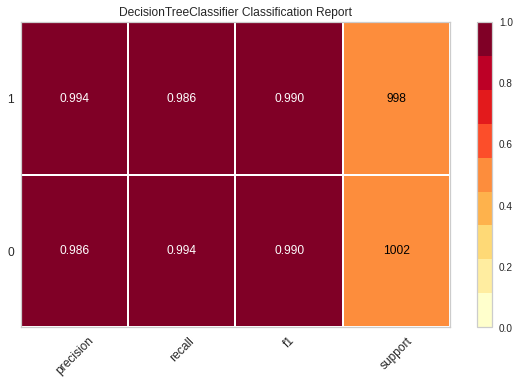

In [ ]:
from yellowbrick.classifier import ClassificationReport

visualizer = ClassificationReport(clf, support=True)
visualizer.fit(X_ar, y_ar)        
visualizer.score(X_ar, y_ar)       
visualizer.show()      ;    

**precision**

Precision can be seen as a measure of a classifier’s exactness. _For each class, it is defined as the ratio of true positives to the sum of true and false positives_. Said another way, “for all instances classified positive, what percent was correct?”

>  Por meio desse conceito, podemos observar que a árvore de decisão acertou como `0` (98.6%) vemos que foi maior do que os valores classificados como `1` (99.4%).

**recall**
Recall is a measure of the classifier’s completeness; _the ability of a classifier to correctly find all positive instances_. For each class, it is defined as the ratio of true positives to the sum of true positives and false negatives. Said another way, “for all instances that were actually positive, what percent was classified correctly?”

> Podemos observar que esses dados estão bem distribuídos devido aos valores encontrados no classificador. Os valores são inversamente proporcionais. Para o **_recall_**, portanto, para todos os valores encontrados para cada classe `[0,1]`, qual a porcentagem de acerto?
> Uma outra forma de ler a informação do recall é: Da porcentagem encontrada para cada classe classe, qual a precisão de acerto. 99.4% foi classificada como pertencente a classe `0` com uma precisão de 98.6%.

**f1 score**
The F1 score is a weighted harmonic mean of precision and recall such that the best score is 1.0 and the worst is 0.0. Generally speaking, F1 scores are lower than accuracy measures as they embed precision and recall into their computation. As a rule of thumb, the weighted average of F1 should be used to compare classifier models, not global accuracy.

> Comparando os dois modelos, podemos observar que a `f1` é a média harmônica entre a precisão e o recall. Dessa forma podemos comparar a árvore de decisão com a floresta randômica. E observamos que a árvore perfomou levemente melhor do que a floresta randômica. 

**support**
Support is the number of actual occurrences of the class in the specified dataset. _Imbalanced support in the training data may indicate structural weaknesses in the reported scores of the classifier and could indicate the need for stratified sampling or rebalancing_. Support doesn’t change between models but instead diagnoses the evaluation process.


[Text(0.5, 0.875, 'x[1] <= 0.084\ngini = 0.5\nsamples = 2000\nvalue = [1000.0, 1000.0]\nclass = 1'),
 Text(0.25, 0.625, 'x[4] <= -1.37\ngini = 0.027\nsamples = 1010\nvalue = [994.012, 14.028]\nclass = 0'),
 Text(0.125, 0.375, 'x[7] <= -0.702\ngini = 0.093\nsamples = 82\nvalue = [77.844, 4.008]\nclass = 0'),
 Text(0.0625, 0.125, 'gini = 0.246\nsamples = 14\nvalue = [11.976, 2.004]\nclass = 0'),
 Text(0.1875, 0.125, 'gini = 0.057\nsamples = 68\nvalue = [65.868, 2.004]\nclass = 0'),
 Text(0.375, 0.375, 'x[3] <= -0.763\ngini = 0.021\nsamples = 928\nvalue = [916.168, 10.02]\nclass = 0'),
 Text(0.3125, 0.125, 'gini = 0.048\nsamples = 203\nvalue = [197.605, 5.01]\nclass = 0'),
 Text(0.4375, 0.125, 'gini = 0.014\nsamples = 725\nvalue = [718.563, 5.01]\nclass = 0'),
 Text(0.75, 0.625, 'x[2] <= 0.819\ngini = 0.012\nsamples = 990\nvalue = [5.988, 985.972]\nclass = 1'),
 Text(0.625, 0.375, 'x[3] <= 0.02\ngini = 0.007\nsamples = 798\nvalue = [2.994, 796.593]\nclass = 1'),
 Text(0.5625, 0.125, 'gini

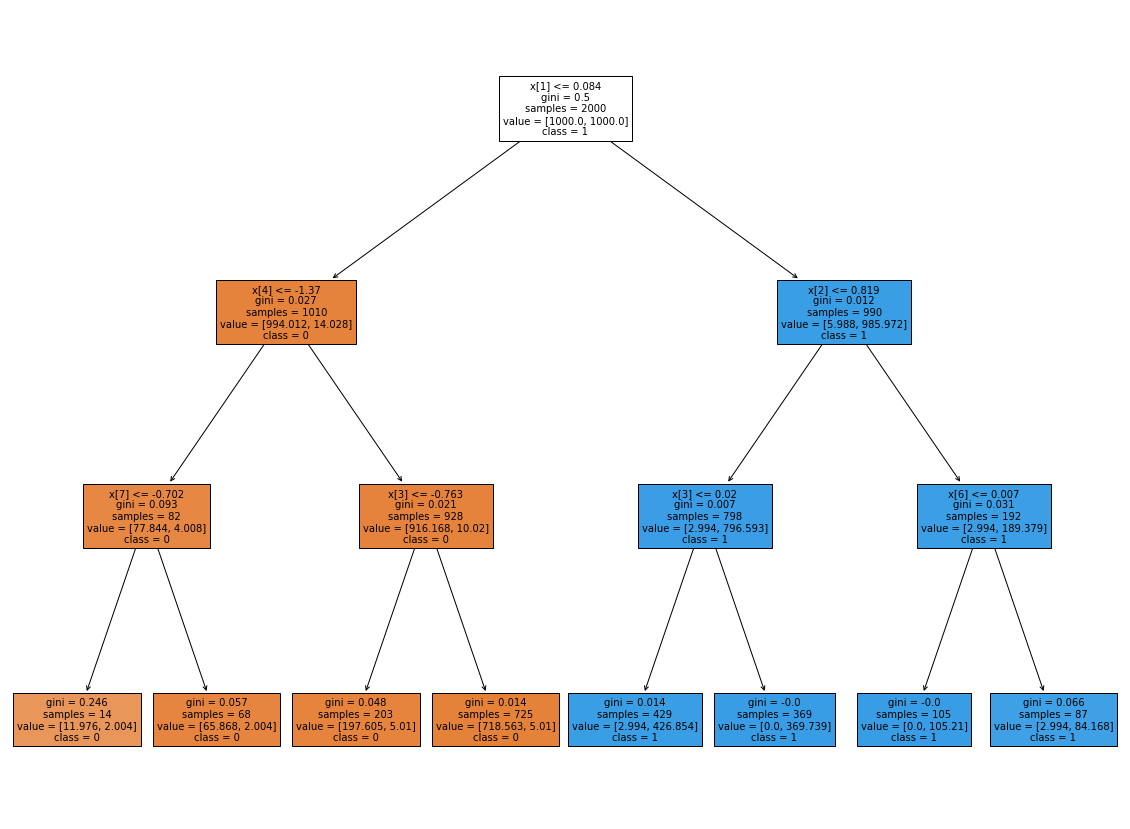

In [ ]:
fig = plt.figure(figsize=(20,15))
tree.plot_tree(clf, class_names=['0','1'], filled=True)

In [ ]:
X_rn, y_rn = make_classification(n_samples=1000, n_features=8,
                            n_informative=2, n_redundant=0,
                            random_state=0, shuffle=False)

# Observe que um método Ensemble performa muito melhor do que uma árvore de decisão individual
# 

clf_rn = RandomForestClassifier(criterion='gini', n_estimators=900,
                             max_depth=3, max_features='log2',
                             min_samples_leaf=5, max_leaf_nodes=6,
                             bootstrap=True, oob_score=True, n_jobs=-1, class_weight='balanced',
                             random_state=0)

clf_rn.fit(X_rn, y_rn)
clf_rn.score(X_rn, y_rn)

0.957

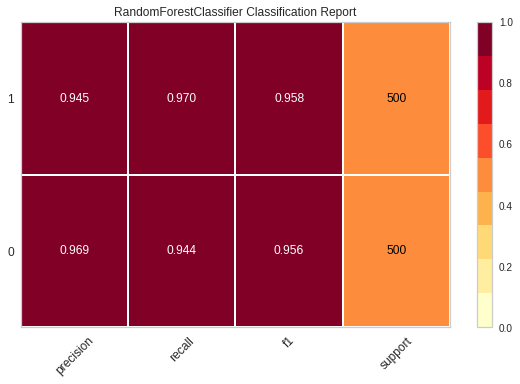

In [ ]:
visualizer = ClassificationReport(clf_rn, support=True)
visualizer.fit(X_rn, y_rn)        
visualizer.score(X_rn, y_rn)       
visualizer.show()      ; 

# Treinando Modelos (Regressão Linear)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
X = 2 * np.random.rand(100,1)

# equação 4 + 3 * ruído gaussiano
y = 4 + 3 * X + np.random.rand(100,1)

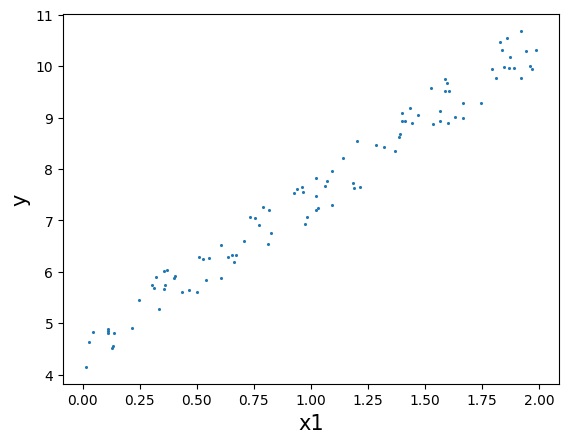

In [ ]:
fig, ax = plt.subplots()

ax.scatter(X, y, s=1.5)
ax.set_xlabel('x1', fontsize=15)
ax.set_ylabel('y', fontsize=15)

plt.show()

In [ ]:
X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)

In [ ]:
# O ruído tornou impossível recuperar os parâmetros exatos da função original
# esperávamos : teta0 = 4 e teta(1) = 3
theta_best

array([[4.519463  ],
       [2.97608608]])

In [ ]:
# Vamos fazer previsões utilizando o valor de teta que minimize o valor de MSE (erro)

X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # ad x(0) = 1 a cada uma das instâncias
y_predict = X_new_b.dot(theta_best)
y_predict

array([[ 4.519463  ],
       [10.47163516]])

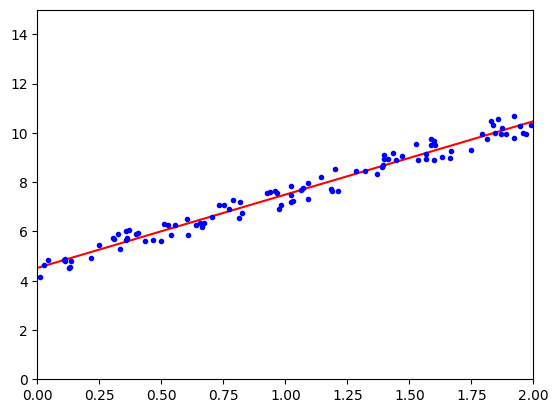

In [ ]:
# Plotando as previsões do modelo

plt.plot(X_new, y_predict, 'r-')
plt.plot(X, y, 'b. ')
plt.axis([0,2,0,15])
plt.show()

In [ ]:
# Utilizando a biblioteca do scikit-learn
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([4.519463]), array([[2.97608608]]))

In [ ]:
lin_reg.predict(X_new)

array([[ 4.519463  ],
       [10.47163516]])

Treinar um modelo de regressão linear utilizando o método dos mínimos quadrados não é adequado para uma quantidade grande de instâncias (~100mil) pois fazer previsões em duas vezes mais instâncias (ou o dobro de recursos) levará aproximadamente o dobro do tempo.

## Regressão de Ridge

In [ ]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.rand(m, 1)

In [ ]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

def plot_learning_curves(model, x, y):
  X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)
  train_errors, val_errors = [], []
  for m in range(1, len(X_train)):
    model.fit(X_train[:m], y_train[:m])
    y_train_predict = model.predict(X_train[:m])
    y_val_predict = model.predict(X_val)
    train_errors.append(mean_squared_error(y_train_predict, y_train[:m]))
    val_errors.append(mean_squared_error(y_val_predict, y_val))
  plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
  plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")

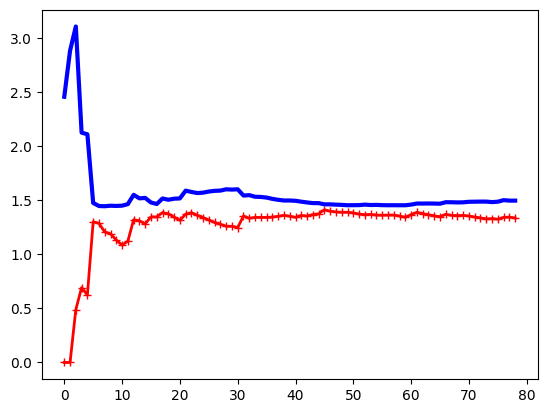

In [ ]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias = False)
X_poly = poly_features.fit_transform(X)
X[0] 

array([1.40567947])

In [ ]:
X_poly[0] # Dados originais + o quadrado desse valor

array([1.40567947, 1.97593478])

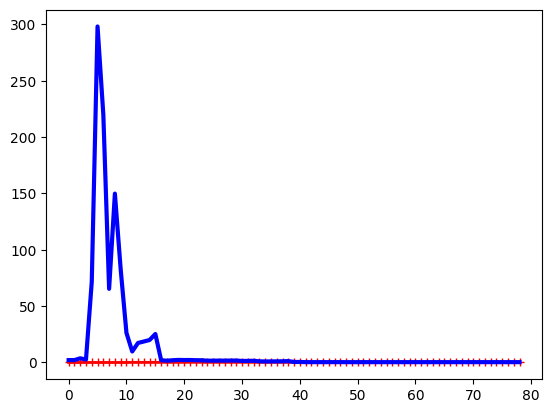

In [ ]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
    ("poly_features", PolynomialFeatures(degree=10, include_bias = False)),
    ("lin_reg", LinearRegression()),
])

plot_learning_curves(polynomial_regression, X, y)

## Modelos Lineares Regularizados

### Ridge

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="cholesky")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.5084005]])

In [ ]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha = 1, solver="sag")
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[5.50769375]])

### LASSO

In [ ]:
from sklearn.linear_model import Lasso

lasso_reg = Lasso(alpha = 0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])

array([5.46271209])

### Elastic Net

In [ ]:
from sklearn.linear_model import ElasticNet

elastic_net = ElasticNet(alpha = 0.1, l1_ratio = 0.35)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([5.46422258])

### Parada Antecipada 

In [ ]:
from sklearn.base import clone
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDRegressor

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size = 0.2)

# preparando os dados
poly_scaler = Pipeline([
    ("poly_features", PolynomialFeatures(degree=90, include_bias = False)),
    ("std_scaler", StandardScaler()) ])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor()

minimum_val_error = float("inf")
best_epoch = None
best_model = None

for epoch in range(1000):

  sgd_reg.fit(X_train_poly_scaled, y_train) # continua de onde parou
  y_val_predict = sgd_reg.predict(X_val_poly_scaled)
  val_error = mean_squared_error(y_val_predict, y_val)

  if val_error < minimum_val_error:
    minimum_val_error = val_error
    best_epoch = epoch
    best_model = clone(sgd_reg)

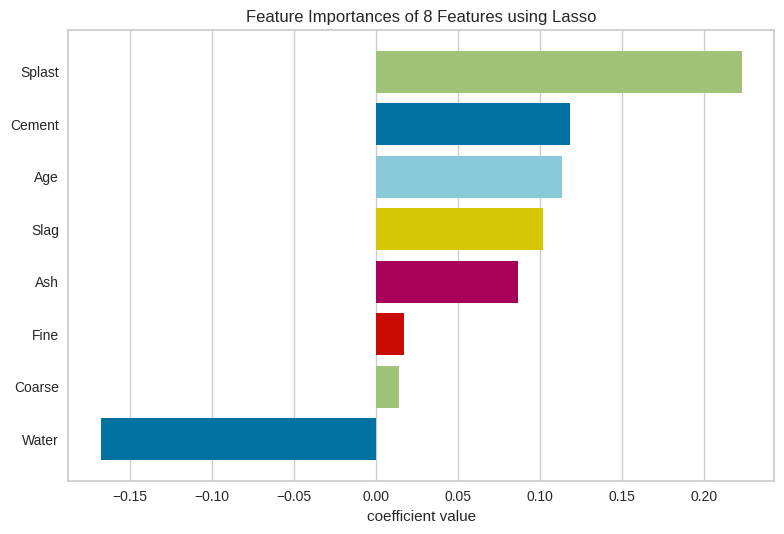

<Axes: title={'center': 'Feature Importances of 8 Features using Lasso'}, xlabel='coefficient value'>

In [ ]:
from sklearn.linear_model import Lasso
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances

# Load the regression dataset
dataset = load_concrete(return_dataset=True)
X, y = dataset.to_data()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), dataset.meta['features']))
viz = FeatureImportances(Lasso(), labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show()

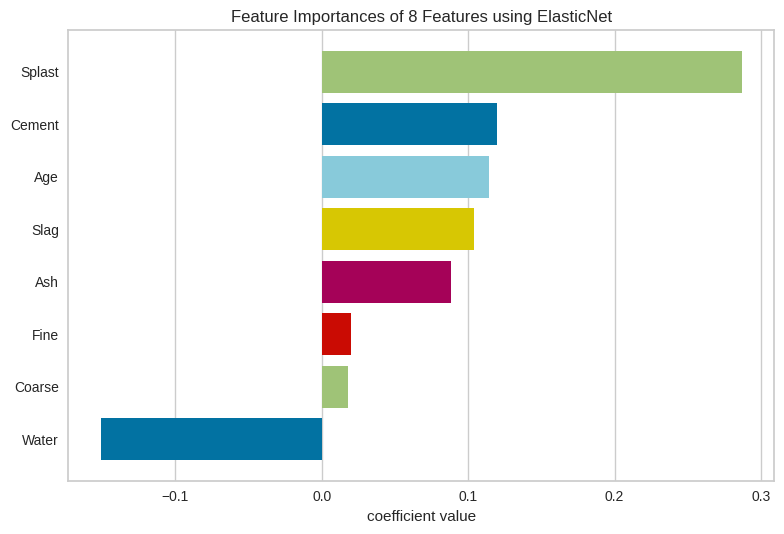

In [ ]:
from yellowbrick.datasets import load_concrete
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import ElasticNet

# Load the regression dataset
dataset = load_concrete(return_dataset=True)
X, y = dataset.to_data()

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), dataset.meta['features']))
viz = FeatureImportances(ElasticNet(alpha = 0.1, l1_ratio = 0.35), labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show();

In [ ]:
from sklearn.datasets import load_iris
from yellowbrick.model_selection import FeatureImportances
from sklearn.linear_model import ElasticNet

# Load the regression dataset
# target_names
dataset = load_iris(as_frame=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7)

# Title case the feature for better display and create the visualizer
labels = list(map(lambda s: s.title(), dataset.data['data']))
viz = FeatureImportances(ElasticNet(alpha = 0.1, l1_ratio = 0.35), labels=labels, relative=False)

# Fit and show the feature importances
viz.fit(X, y)
viz.show();

In [ ]:
print(dataset)

## Regressão Logística

In [2]:
from sklearn import datasets
iris = datasets.load_iris()
print(list(iris.keys()))

['data', 'target', 'frame', 'target_names', 'DESCR', 'feature_names', 'filename', 'data_module']


In [6]:
import numpy as np

X = iris['data'][:, 3:]
y = (iris["target"] == 2).astype(np.int)

<ipython-input-6-96965e1cd6fe>:4: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris["target"] == 2).astype(np.int)


In [7]:
y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [8]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

LogisticRegression()

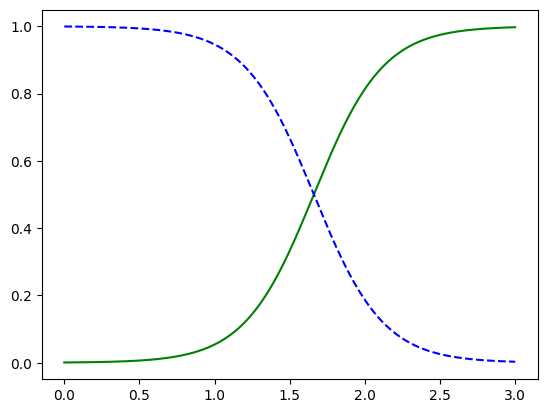

In [10]:
import matplotlib.pyplot as plt

X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)

"""
O que esse gráfico significa?

Observe que há um pouco de sobreposição. Quando está acima de cerca de 2cm,
o classificador confia muito que seja uma flor Iris-Virginica (alta probabilidade)
e se estiver muito abaixo de 1cm ele é muito confiante de que não é uma Iris-Virginica.
Entre esses extremos, o classificador não tem tanta certeza. No entanto, se você pedir que ele preveja
a classe (com o predict() ao inves do predict_proba()), ele retornará a classe que for mais provável.

Portanto existe uma fronteira de decisão, entorno de 1.6cm, o classificador preverá que a flor é uma Iris-Virginica
ou então que não é 

"""


plt.plot(X_new, y_proba[:, 1], "g-", label = "Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", label = "Not Iris-Virginica");



In [13]:
log_reg.predict([[1.7], [1.5]])

array([1, 0])